In [67]:
import pandas as pd
import numpy as np

rent_data = pd.read_csv("./Datasets/train.csv")
stock_data = pd.read_csv("./Datasets/auxiliary-data/sg-stock-prices.csv")


In [68]:
# Convert the date columns to datetime format
rent_data['rent_approval_date'] = pd.to_datetime(rent_data['rent_approval_date'])
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Extract year and month for both datasets
rent_data['year_month'] = rent_data['rent_approval_date'].dt.to_period('M')
stock_data['year_month'] = stock_data['date'].dt.to_period('M')

# Calculate the average monthly rent and stock closing prices
avg_monthly_rent = rent_data.groupby('year_month')['monthly_rent'].mean()
avg_monthly_stock_close = stock_data.groupby(['year_month','name'])['close'].mean()
# avg_monthly_stock_open = stock_data.groupby('year_month')['open'].mean()
# avg_monthly_stock_close.reset_index()
# mean = avg_monthly_stock_close.xs('ASLAN Pharmaceuticals', level='name').mean()
# avg_monthly_stock_close.xs('ASLAN Pharmaceuticals', level='name') = avg_monthly_stock_close.xs('ASLAN Pharmaceuticals', level='name') / mean
def normalize_by_mean(x):
    # if (x/10).mean() > 2:
    #     return x / x.mean() * np.log2((x/10).mean())
    # else:
    #     return x / x.mean()
    # print(x.max())
    return x  / x.mean() #* max(np.log(x.mean()/20), 1)

# 使用 groupby 和 transform 进行操作
normalized_close = avg_monthly_stock_close.groupby(level='name').transform(normalize_by_mean)

# 将结果赋值给 avg_monthly_stock_close
avg_monthly_stock_close = normalized_close
avg_monthly_stock_close = avg_monthly_stock_close.groupby(level='year_month').mean()

# avg_monthly_stock_price = (avg_monthly_stock_open + avg_monthly_stock_close) /2
# Merge the two datasets on year_month
# merged_data = pd.merge(avg_monthly_rent, avg_monthly_stock_open, left_index=True, right_index=True, how='inner')
merged_data = pd.merge(avg_monthly_rent, avg_monthly_stock_close, left_index=True, right_index=True, how='inner')
# merged_data['close'] = merged_data['close'] - merged_data['monthly_rent'] / 20000
# merged_data['close'] = pd.cut(merged_data['close'], bins=[0, 0.9, 0.95, 1.0, 1.1, float('inf')], labels=[5, 4, 3, 2, 1], right=False).astype('int64')

# merged_data['close'].iloc[1:] = merged_data['close'].iloc[:-1]
merged_data['log_stock_price'] = np.log(merged_data['close'] + 1)
merged_data['moving_avg'] = merged_data['close'].rolling(window=5).mean()
merged_data['moving_avg'].iloc[:4] = merged_data['close'].iloc[:4]
# merged_data['moving_avg'] = pd.cut(merged_data['moving_avg'], bins=[0.85, 0.9, 0.95, 1.05, 1.2], labels=[4, 3, 2, 1], right=False).astype('int64')
merged_data['stock_diff'] = merged_data['close'].diff()
merged_data['stock_diff'].iloc[0] = merged_data['stock_diff'].iloc[1]

merged_data['stock_pct_change'] = merged_data['close'].pct_change()
merged_data['stock_pct_change'].iloc[0] = merged_data['stock_pct_change'].iloc[1]
merged_data

,monthly_rent,close,log_stock_price,moving_avg,stock_diff,stock_pct_change
year_month,,,,,,
2021-01,2152.142513,1.122847,0.752758,1.122847,0.026592,0.023682
2021-02,2146.756152,1.149439,0.765207,1.149439,0.026592,0.023682
2021-03,2167.458384,1.142360,0.761908,1.142360,-0.007078,-0.006158
2021-04,2182.674772,1.165189,0.772508,1.165189,0.022828,0.019983
2021-05,2216.537301,1.111632,0.747461,1.138293,-0.053557,-0.045964
2021-06,2223.939114,1.129647,0.755956,1.139653,0.018015,0.016206
2021-07,2252.984718,1.082505,0.733572,1.126267,-0.047141,-0.041731
2021-08,2249.901768,1.071465,0.728256,1.112088,-0.011040,-0.010199
2021-09,2233.926780,1.166176,0.772963,1.112285,0.094710,0.088393


In [69]:
correlation = merged_data[['log_stock_price', 'stock_diff', 'stock_pct_change', 'moving_avg', 'monthly_rent', 'close']].corr()
print(correlation['monthly_rent'])

log_stock_price    -0.904020
stock_diff         -0.021101
stock_pct_change   -0.036172
moving_avg         -0.974210
monthly_rent        1.000000
close              -0.896083
Name: monthly_rent, dtype: float64


(-0.9742096422274665, 2.6725823884291526e-20)

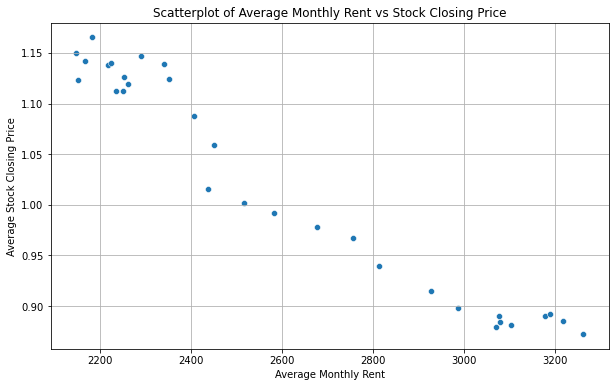

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='monthly_rent', y='moving_avg')
plt.title('Scatterplot of Average Monthly Rent vs Stock Closing Price')
plt.xlabel('Average Monthly Rent')
plt.ylabel('Average Stock Closing Price')
plt.grid(True)

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(merged_data['monthly_rent'], merged_data['moving_avg'])
correlation_coefficient, p_value

In [71]:
stock_path = './Datasets/train.csv'
stock_df = pd.read_csv(stock_path)

stock_df['rent_approval_date'] = pd.to_datetime(stock_df['rent_approval_date'])
stock_df['year_month'] = stock_df['rent_approval_date'].dt.to_period('M')
stock_df = stock_df.merge(merged_data, on='year_month', how='left')

stock_df['stock_price'] =  stock_df['moving_avg']
# stock_df = stock_df.rename(columns={'close_y': 'close'})
# stock_df = stock_df.rename(columns={'close_y': 'close'})
stock_df = stock_df[['stock_price']]
stock_df.to_csv('./Datasets/stock_train.csv', index=False)